<a href="https://colab.research.google.com/github/Israel-Orere/Food-dataset-solutions-for-the-Hamoye-quiz/blob/main/StageE_Orere_Israel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from datetime import datetime

In [23]:
train = pd.read_csv("/content/drive/MyDrive/Time_series_analysis_and_forecast_DATASET.csv", parse_dates=['FullDate'])

In [24]:
train.head(4)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [25]:
train.set_index('FullDate', inplace=True)

In [26]:
train.head(4)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [27]:
train_daily=train.resample( 'D' ).sum()

In [29]:
train.shape

(92016, 4)

In [30]:
train_daily.head(4)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275


Text(0, 0.5, 'ElecPrice')

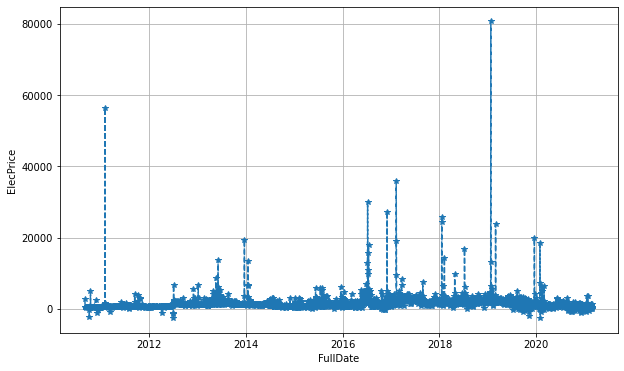

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=( 10 , 6 ))
plt.plot(train_daily.index, train_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [42]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(train_daily[ 'SysLoad' ])


In [43]:
adf_result

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '10%': -2.567174716967499,
  '5%': -2.8623002987378547},
 79103.01504886392)

In [39]:
print( f 'ADF Statistic: {adf_result[ 0 ]} ' )
print( f 'p-value: {adf_result[ 1 ]} ' )
print( f 'No. of lags used: {adf_result[ 2 ]} ' )
print( f 'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

SyntaxError: ignored

In [44]:
adf_result2 = adfuller(train_daily[ 'GasPrice' ])

In [45]:
adf_result2

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '10%': -2.5671743978048323,
  '5%': -2.8622996992165364},
 32857.5394299048)

In [48]:
adf_result3 = adfuller(train_daily[ 'ElecPrice' ])

In [49]:
adf_result3

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '10%': -2.5671736550459663,
  '5%': -2.8622983040036005},
 69130.36360776308)

In [50]:
from fbprophet import Prophet 

In [51]:
train_daily_train=train_daily[:2757]

In [123]:
train_daily_1stModel=train_daily.copy()
train_daily_1stModel=train_daily_1stModel.reset_index()



train_daily_1stModel = train_daily_1stModel.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
train_daily_1stModel.head() 


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [117]:
train_daily_1stModel.drop(['Tmax','SysLoad','GasPrice'], axis = 1, inplace=True) 

In [103]:
from sklearn.metrics import mean_squared_error

In [118]:
model = Prophet()
model.fit(train_daily_1stModel[:2757]) 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
predicted=model.predict(test)
predicted.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,325.313503,4977.964386,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,246.565561,4921.429438,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,599.384282,5148.961829,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,158.798872,5127.358017,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221


In [137]:
test=train_daily_1stModel[2757:]

In [138]:
test.head(4)

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76


In [140]:
mean_squared_error(predicted['yhat'], test['y'], squared=False)

3218.15577651241

In [124]:
train_daily_2ndModel = train_daily_1stModel.rename(columns={ "FullDate" : "ds" , "Tmax" : "add1", "SysLoad": "add2", "GasPrice": "add3", "ElecPrice" : "y" })
train_daily_2ndModel.head() 

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [125]:
model2=Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')


In [126]:
model2.fit(train_daily_2ndModel[:2757])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
test2=train_daily_2ndModel[2757:]

In [128]:
prediction2=model2.predict(test2)

In [129]:
mean_squared_error(prediction2['yhat'], test2['y'], squared=False)


2707.0355566662724